# Concrete Strength Prediction with Neural Networks

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


## Creating own data with scikit learn

In [2]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=30, n_samples=5000, noise=10, random_state=42)

In [3]:
X

array([[ 0.73579588,  1.04112706, -0.87140389, ..., -1.28557712,
         0.8309933 , -1.58487991],
       [-0.108076  ,  2.32106851,  2.29221164, ...,  0.68131372,
        -2.40173397, -1.18387309],
       [ 0.30806463, -0.82467886,  1.38549697, ...,  1.4745775 ,
        -0.86784344, -0.11117936],
       ...,
       [ 0.46886758,  0.94334516,  0.44395667, ...,  1.35342463,
         0.09998062, -0.7785281 ],
       [ 0.75775478,  0.43412698, -0.12148711, ..., -0.97502138,
         1.3888001 ,  0.36543184],
       [-0.11071739, -0.60025471, -0.13589803, ...,  0.00344785,
         1.33576046,  1.48514776]])

In [4]:
X.shape

(5000, 30)

In [5]:
Y.shape

(5000,)

In [6]:
cols = [f'x{i}' for i in range(30)]

In [7]:
cols

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29']

In [8]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = cols
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.735796,1.041127,-0.871404,0.508606,-0.636648,1.332272,-0.503400,1.374134,1.270885,1.988603,...,0.317767,2.951914,-0.248546,-0.870800,-1.569923,0.395626,1.066135,-1.285577,0.830993,-1.584880
1,-0.108076,2.321069,2.292212,1.122974,0.558116,-0.328548,1.750118,-0.534911,0.213996,0.364157,...,0.081067,0.497429,0.824820,0.205803,-0.622931,-0.853174,0.924574,0.681314,-2.401734,-1.183873
2,0.308065,-0.824679,1.385497,1.927543,0.236301,0.562039,0.465317,-1.171702,0.346263,-0.152707,...,-0.834410,-1.240574,-0.722814,-0.107633,0.424254,-1.886220,2.157491,1.474577,-0.867843,-0.111179
3,-0.837979,-0.001572,-0.879153,-0.215569,0.108785,1.122969,-1.351074,0.652168,-0.142286,-0.348107,...,-0.861413,-1.071020,0.300968,-0.835940,0.410507,-0.308762,0.009512,1.576850,-0.367144,-0.796132
4,-0.252247,-0.407280,1.432967,-0.489814,-0.154190,0.385624,1.356910,1.209124,2.927645,-0.156261,...,-0.318957,3.536532,1.391892,0.385200,-0.620109,1.764385,-0.765251,0.003286,0.170299,-0.905189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531823,-0.753699,-0.526386,-0.134938,-0.572953,-0.259428,-0.491569,-0.442929,0.767339,-0.807009,...,-0.451589,-2.689713,0.236172,-2.629400,1.804714,0.158483,0.457955,0.665615,1.110167,0.672384
4996,0.378681,0.842819,-0.146172,-1.625534,-0.955834,0.185233,-1.016409,1.275818,-1.631155,-1.343036,...,0.096142,0.726612,-0.280988,-0.070456,1.671552,-0.261690,1.142516,-0.998338,0.523002,1.496653
4997,0.468868,0.943345,0.443957,-0.671411,-0.117502,0.544626,0.348450,0.553522,0.505444,-0.346620,...,0.378791,0.449205,0.890035,-1.157446,0.979357,0.497428,-0.312307,1.353425,0.099981,-0.778528
4998,0.757755,0.434127,-0.121487,-0.217615,-0.088260,-0.355547,-0.803803,0.893347,0.145759,-1.258296,...,-0.441476,1.075934,0.511556,0.737071,1.306280,1.712308,-1.226916,-0.975021,1.388800,0.365432


In [9]:
Y=pd.DataFrame(Y)
Y.columns = ['Y']
Y

,Y
0,150.973830
1,34.772072
2,-254.332036
3,67.563592
4,371.994270
...,...
4995,-75.457805
4996,214.869422
4997,281.812602
4998,197.266648


### Create preprocessing pipeline for X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.74522802,  1.05648626, -0.90506965, ..., -1.30803257,
         0.84170597, -1.57717141],
       [-0.10350458,  2.31911253,  2.31665157, ...,  0.67291129,
        -2.37529169, -1.17462579],
       [ 0.31503302, -0.78407885,  1.3932834 , ...,  1.47184277,
        -0.84886467, -0.09781578],
       ...,
       [ 0.47676221,  0.96002717,  0.43444996, ...,  1.3498243 ,
         0.11425021, -0.76772536],
       [ 0.7673134 ,  0.45769774, -0.14137924, ..., -0.99525798,
         1.39679863,  0.38062434],
       [-0.10616118, -0.56269073, -0.15605485, ..., -0.00979779,
         1.34401706,  1.50463697]])

In [13]:
cols = num_pipe.get_feature_names_out()
cols

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29'], dtype=object)

In [14]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.745228,1.056486,-0.905070,0.519462,-0.639618,1.338450,-0.481092,1.363730,1.263597,1.958957,...,0.327146,2.928869,-0.272461,-0.845469,-1.578828,0.378638,1.069910,-1.308033,0.841706,-1.577171
1,-0.103505,2.319113,2.316652,1.141287,0.551350,-0.326713,1.759410,-0.546866,0.203975,0.352701,...,0.088325,0.492024,0.809076,0.194107,-0.632590,-0.855621,0.928962,0.672911,-2.375292,-1.174626
2,0.315033,-0.784079,1.393283,1.955622,0.230558,0.566203,0.482029,-1.184175,0.336584,-0.158376,...,-0.835351,-1.233488,-0.750340,-0.108549,0.413763,-1.876639,2.156540,1.471843,-0.848865,-0.097816
3,-0.837612,0.027893,-0.912961,-0.213504,0.103447,1.128600,-1.323870,0.641177,-0.153228,-0.351588,...,-0.862595,-1.065153,0.281236,-0.811807,0.400026,-0.317548,0.017862,1.574846,-0.350601,-0.785396
4,-0.248506,-0.372327,1.441625,-0.491078,-0.158693,0.389326,1.368473,1.198586,2.924641,-0.161889,...,-0.315281,3.509286,1.380466,0.367333,-0.629769,1.731461,-0.753547,-0.009961,0.184226,-0.894872


### Train Test split

# Concrete Strength Prediction with Neural Networks

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

## Creating own data with scikit learn

In [16]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=30, n_samples=5000, noise=10, random_state=42)

In [17]:
X

array([[ 0.73579588,  1.04112706, -0.87140389, ..., -1.28557712,
         0.8309933 , -1.58487991],
       [-0.108076  ,  2.32106851,  2.29221164, ...,  0.68131372,
        -2.40173397, -1.18387309],
       [ 0.30806463, -0.82467886,  1.38549697, ...,  1.4745775 ,
        -0.86784344, -0.11117936],
       ...,
       [ 0.46886758,  0.94334516,  0.44395667, ...,  1.35342463,
         0.09998062, -0.7785281 ],
       [ 0.75775478,  0.43412698, -0.12148711, ..., -0.97502138,
         1.3888001 ,  0.36543184],
       [-0.11071739, -0.60025471, -0.13589803, ...,  0.00344785,
         1.33576046,  1.48514776]])

In [18]:
X.shape

(5000, 30)

In [19]:
Y.shape

(5000,)

In [20]:
cols = [f'x{i}' for i in range(30)]

In [21]:
cols

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29']

In [22]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = cols
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.735796,1.041127,-0.871404,0.508606,-0.636648,1.332272,-0.503400,1.374134,1.270885,1.988603,...,0.317767,2.951914,-0.248546,-0.870800,-1.569923,0.395626,1.066135,-1.285577,0.830993,-1.584880
1,-0.108076,2.321069,2.292212,1.122974,0.558116,-0.328548,1.750118,-0.534911,0.213996,0.364157,...,0.081067,0.497429,0.824820,0.205803,-0.622931,-0.853174,0.924574,0.681314,-2.401734,-1.183873
2,0.308065,-0.824679,1.385497,1.927543,0.236301,0.562039,0.465317,-1.171702,0.346263,-0.152707,...,-0.834410,-1.240574,-0.722814,-0.107633,0.424254,-1.886220,2.157491,1.474577,-0.867843,-0.111179
3,-0.837979,-0.001572,-0.879153,-0.215569,0.108785,1.122969,-1.351074,0.652168,-0.142286,-0.348107,...,-0.861413,-1.071020,0.300968,-0.835940,0.410507,-0.308762,0.009512,1.576850,-0.367144,-0.796132
4,-0.252247,-0.407280,1.432967,-0.489814,-0.154190,0.385624,1.356910,1.209124,2.927645,-0.156261,...,-0.318957,3.536532,1.391892,0.385200,-0.620109,1.764385,-0.765251,0.003286,0.170299,-0.905189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531823,-0.753699,-0.526386,-0.134938,-0.572953,-0.259428,-0.491569,-0.442929,0.767339,-0.807009,...,-0.451589,-2.689713,0.236172,-2.629400,1.804714,0.158483,0.457955,0.665615,1.110167,0.672384
4996,0.378681,0.842819,-0.146172,-1.625534,-0.955834,0.185233,-1.016409,1.275818,-1.631155,-1.343036,...,0.096142,0.726612,-0.280988,-0.070456,1.671552,-0.261690,1.142516,-0.998338,0.523002,1.496653
4997,0.468868,0.943345,0.443957,-0.671411,-0.117502,0.544626,0.348450,0.553522,0.505444,-0.346620,...,0.378791,0.449205,0.890035,-1.157446,0.979357,0.497428,-0.312307,1.353425,0.099981,-0.778528
4998,0.757755,0.434127,-0.121487,-0.217615,-0.088260,-0.355547,-0.803803,0.893347,0.145759,-1.258296,...,-0.441476,1.075934,0.511556,0.737071,1.306280,1.712308,-1.226916,-0.975021,1.388800,0.365432


In [23]:
Y=pd.DataFrame(Y)
Y.columns = ['Y']
Y

,Y
0,150.973830
1,34.772072
2,-254.332036
3,67.563592
4,371.994270
...,...
4995,-75.457805
4996,214.869422
4997,281.812602
4998,197.266648


### Create preprocessing pipeline for X

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [25]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [26]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.74522802,  1.05648626, -0.90506965, ..., -1.30803257,
         0.84170597, -1.57717141],
       [-0.10350458,  2.31911253,  2.31665157, ...,  0.67291129,
        -2.37529169, -1.17462579],
       [ 0.31503302, -0.78407885,  1.3932834 , ...,  1.47184277,
        -0.84886467, -0.09781578],
       ...,
       [ 0.47676221,  0.96002717,  0.43444996, ...,  1.3498243 ,
         0.11425021, -0.76772536],
       [ 0.7673134 ,  0.45769774, -0.14137924, ..., -0.99525798,
         1.39679863,  0.38062434],
       [-0.10616118, -0.56269073, -0.15605485, ..., -0.00979779,
         1.34401706,  1.50463697]])

In [27]:
cols = num_pipe.get_feature_names_out()
cols

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29'], dtype=object)

In [28]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.745228,1.056486,-0.905070,0.519462,-0.639618,1.338450,-0.481092,1.363730,1.263597,1.958957,...,0.327146,2.928869,-0.272461,-0.845469,-1.578828,0.378638,1.069910,-1.308033,0.841706,-1.577171
1,-0.103505,2.319113,2.316652,1.141287,0.551350,-0.326713,1.759410,-0.546866,0.203975,0.352701,...,0.088325,0.492024,0.809076,0.194107,-0.632590,-0.855621,0.928962,0.672911,-2.375292,-1.174626
2,0.315033,-0.784079,1.393283,1.955622,0.230558,0.566203,0.482029,-1.184175,0.336584,-0.158376,...,-0.835351,-1.233488,-0.750340,-0.108549,0.413763,-1.876639,2.156540,1.471843,-0.848865,-0.097816
3,-0.837612,0.027893,-0.912961,-0.213504,0.103447,1.128600,-1.323870,0.641177,-0.153228,-0.351588,...,-0.862595,-1.065153,0.281236,-0.811807,0.400026,-0.317548,0.017862,1.574846,-0.350601,-0.785396
4,-0.248506,-0.372327,1.441625,-0.491078,-0.158693,0.389326,1.368473,1.198586,2.924641,-0.161889,...,-0.315281,3.509286,1.380466,0.367333,-0.629769,1.731461,-0.753547,-0.009961,0.184226,-0.894872


### Train Test split

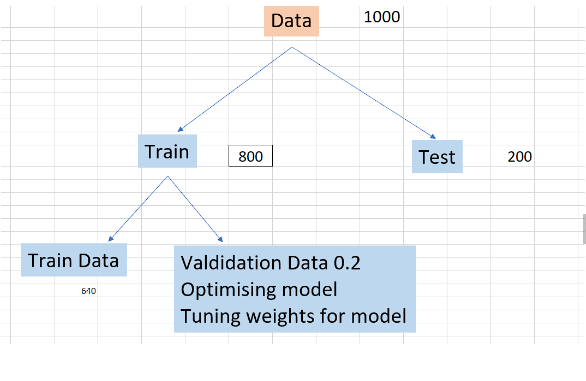

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest  = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [30]:
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
4227,-1.711500,-0.974283,2.148708,1.146298,0.005667,0.195566,-0.383993,-0.718080,0.386160,0.836130,...,-0.038466,-0.586292,-0.755515,1.123953,0.481978,-0.486258,0.334790,0.492318,-0.331858,-0.342493
4676,0.172312,-0.970151,-1.179572,-0.638740,-0.422951,0.177145,0.573145,1.813015,-1.607622,-0.210241,...,0.634777,1.713791,-0.022969,-0.378341,0.832926,-0.503255,0.237117,-0.149347,0.496145,0.754362
800,-1.492289,1.229383,-0.018078,-0.330406,-0.371915,1.970379,-0.418413,0.938733,-2.671832,0.913192,...,1.204552,0.116447,-1.738264,-1.584350,0.806748,0.271933,0.243712,1.454942,-0.461815,-1.043920
3671,0.915208,-0.514593,0.540443,-1.099790,2.368460,-0.297468,-0.562002,0.908696,-1.896036,-0.194337,...,-1.940698,-0.578662,0.707078,0.542981,-0.463365,-0.548334,-1.093015,0.286737,-1.080500,0.341760
4193,-0.887632,0.544564,-0.925896,0.256488,-1.976681,-0.632713,-0.212875,-1.303906,-0.842213,1.017362,...,-1.244223,0.173869,-1.161800,-0.959832,0.309585,-0.131386,-1.678463,-1.296317,-0.200358,0.692108


In [31]:
xtest.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
1501,-0.681669,-0.281059,2.761616,-1.400011,-1.530909,-0.691941,-0.345960,-1.165733,-0.977374,1.478053,...,0.065161,-0.574885,1.219792,-0.408543,0.410107,0.152741,-0.649394,-0.099675,-0.689437,0.316981
2586,-0.324089,-0.272152,0.131552,1.071197,-0.411231,-0.624608,-0.307337,-0.742311,-0.385733,0.749045,...,-0.022851,0.211214,-0.328267,0.025272,0.292487,1.457876,-0.003496,-1.953557,-1.208221,1.142259
2653,1.266622,0.356315,-2.476023,-0.637571,-0.971267,0.664652,0.223826,-0.643297,1.608720,2.256304,...,-0.898993,-1.080242,0.006157,1.155127,2.669230,-1.679951,1.550418,0.778363,-0.765626,-1.815478
1055,1.352776,-0.123473,-0.496008,0.493306,0.947843,0.275741,-0.338589,-1.573045,-2.225637,0.621801,...,1.037722,1.577578,-1.077313,-1.397536,-0.502970,0.760472,-1.593517,0.063864,-0.829425,1.452322
705,-0.669097,0.582714,0.583174,-0.958410,0.875485,0.029174,0.370883,1.022421,1.194240,-0.798537,...,-0.772146,-1.593999,0.447282,0.945441,-0.336529,1.797089,1.423586,0.315882,-1.119409,1.249510


In [32]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [33]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


In [34]:
xtrain.shape

(4000, 30)

In [35]:
xtest.shape

(1000, 30)

In [36]:
xtrain.shape[1]

30

### Create a Neural network

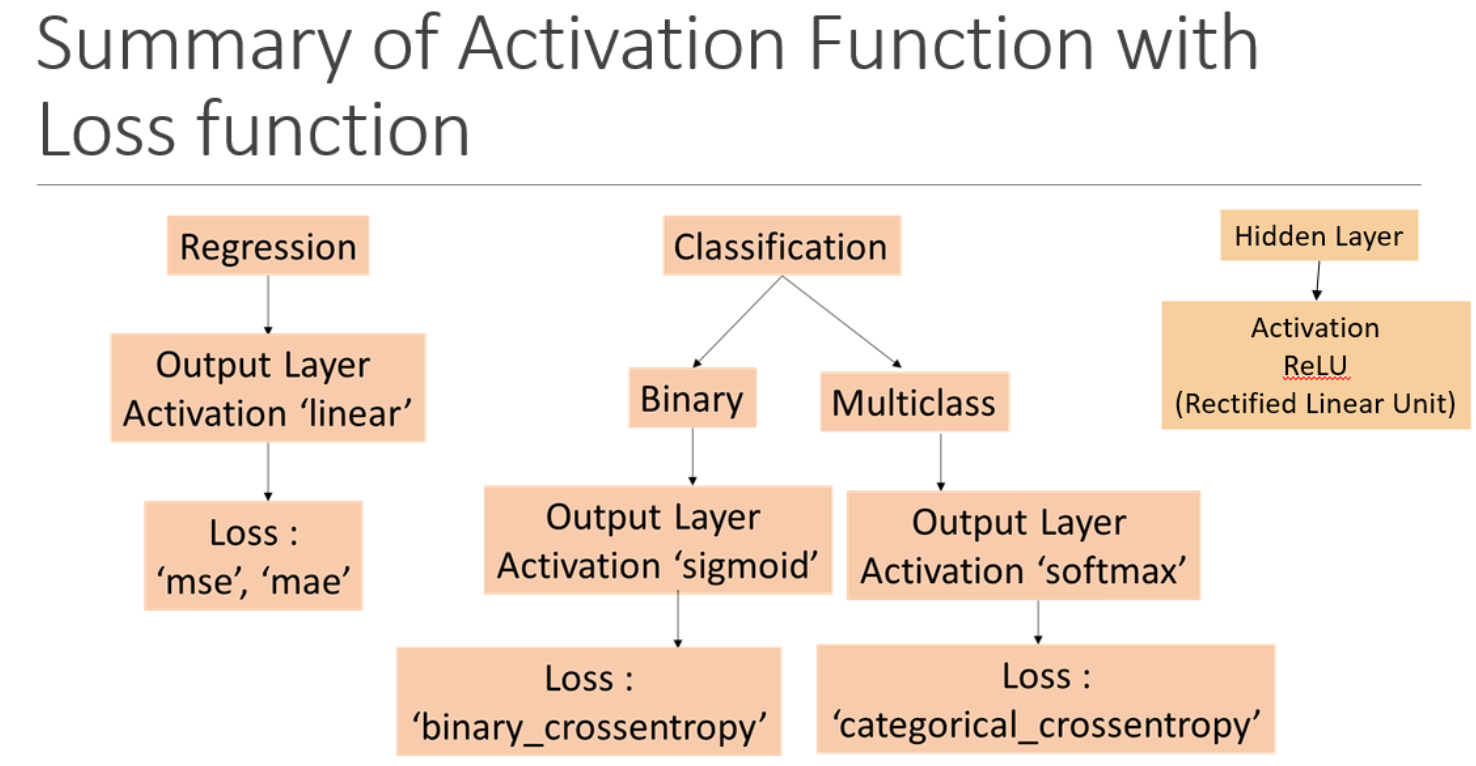

In [38]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
# Initialize Sequential Model
model = Sequential()

# Create Hidden Layer 1
model.add(Dense(units=32, activation='relu', input_dim=xtrain.shape[1]))

# Create Hidden Layer 2
model.add(Dense(units=16, activation='relu'))

# Create Hidden Layer 3
model.add(Dense(units=8, activation='relu'))

# Create output Layer
model.add(Dense(units=1, activation='linear'))

### Compile the model

In [40]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Fit the model

In [41]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


100/100 [==============================] - 1s 4ms/step - loss: 31036.0430 - mae: 141.3130 - val_loss: 30381.2402 - val_mae: 141.4113
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 27618.6367 - mae: 132.6420 - val_loss: 21950.4766 - val_mae: 118.6307
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 11885.5566 - mae: 79.7981 - val_loss: 2984.3245 - val_mae: 39.1594
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 1235.5646 - mae: 25.3046 - val_loss: 579.2378 - val_mae: 18.5389
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 460.7477 - mae: 16.6076 - val_loss: 363.1017 - val_mae: 15.0227
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 321.4902 - mae: 14.0737 - val_loss: 285.2856 - val_mae: 13.4213
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 273.9958 - mae: 13.0983 - val_loss: 253.7413 - val_mae: 12.7517
Epoch 8/1

In [42]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 75.9782 - mae: 6.8455 - val_loss: 139.7432 - val_mae: 9.5687
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 78.2227 - mae: 6.9492 - val_loss: 144.6954 - val_mae: 9.7165
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 76.4201 - mae: 6.8456 - val_loss: 140.1904 - val_mae: 9.6288
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 74.1316 - mae: 6.7828 - val_loss: 135.5134 - val_mae: 9.4129
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 75.1093 - mae: 6.8430 - val_loss: 140.7933 - val_mae: 9.6605
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 74.9952 - mae: 6.8030 - val_loss: 136.0258 - val_mae: 9.3961
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 73.6840 - mae: 6.7221 - val_loss: 134.7230 - val_mae: 9.3889
Epoch 8/100
100/100 [===========================

In [44]:
hist.history['loss']

[75.97815704345703,
 78.22273254394531,
 76.42005920410156,
 74.13163757324219,
 75.10929870605469,
 74.99523162841797,
 73.6839828491211,
 73.93952941894531,
 75.28025817871094,
 74.92195129394531,
 73.7197265625,
 74.36489868164062,
 73.32649230957031,
 74.05889892578125,
 73.97821044921875,
 72.98649597167969,
 74.09009552001953,
 73.46300506591797,
 73.75835418701172,
 74.6211929321289,
 72.86930084228516,
 73.32931518554688,
 72.06903076171875,
 73.70496368408203,
 73.16325378417969,
 72.99557495117188,
 73.81208801269531,
 72.22116088867188,
 72.44844055175781,
 72.66574096679688,
 71.59782409667969,
 70.94113159179688,
 73.36632537841797,
 71.6669921875,
 72.0715560913086,
 69.62139129638672,
 71.16914367675781,
 72.14909362792969,
 71.93743133544922,
 71.72562408447266,
 70.71324157714844,
 70.56695556640625,
 71.3443374633789,
 70.65177154541016,
 70.94306945800781,
 70.07296752929688,
 72.24263000488281,
 70.74980163574219,
 69.68064880371094,
 70.29142761230469,
 70.47743988

In [45]:
hist.history['val_loss']

[139.74322509765625,
 144.69537353515625,
 140.1903533935547,
 135.5133514404297,
 140.79327392578125,
 136.0257568359375,
 134.72299194335938,
 139.7882080078125,
 140.79678344726562,
 137.35858154296875,
 139.9466552734375,
 137.9805908203125,
 140.08482360839844,
 138.94332885742188,
 143.71388244628906,
 142.55320739746094,
 143.53306579589844,
 144.47817993164062,
 140.09210205078125,
 140.8747100830078,
 142.55709838867188,
 139.99258422851562,
 139.25634765625,
 143.31674194335938,
 141.1319580078125,
 144.45761108398438,
 141.3304901123047,
 154.34124755859375,
 143.10353088378906,
 143.63394165039062,
 145.16456604003906,
 141.53553771972656,
 145.9352569580078,
 145.6283416748047,
 141.3108673095703,
 140.95297241210938,
 144.44577026367188,
 143.7476348876953,
 145.2613067626953,
 141.27792358398438,
 143.81590270996094,
 141.4396514892578,
 145.10398864746094,
 146.7157440185547,
 150.06333923339844,
 146.90480041503906,
 145.33364868164062,
 143.59202575683594,
 147.542984

In [46]:
hist.history['mae']

[6.845518589019775,
 6.949247360229492,
 6.845613956451416,
 6.782788276672363,
 6.842973232269287,
 6.802954196929932,
 6.7221245765686035,
 6.788763523101807,
 6.837757587432861,
 6.7620744705200195,
 6.750093460083008,
 6.795264720916748,
 6.7174296379089355,
 6.755464553833008,
 6.763449668884277,
 6.718924522399902,
 6.767221450805664,
 6.733381748199463,
 6.729650497436523,
 6.792692184448242,
 6.684109687805176,
 6.748232364654541,
 6.654706954956055,
 6.773696422576904,
 6.734935283660889,
 6.70701789855957,
 6.757689952850342,
 6.669061660766602,
 6.715229511260986,
 6.6864471435546875,
 6.640871047973633,
 6.608372688293457,
 6.716484546661377,
 6.616031646728516,
 6.64957332611084,
 6.561538219451904,
 6.618178844451904,
 6.6623029708862305,
 6.637045383453369,
 6.6312456130981445,
 6.603035926818848,
 6.583230495452881,
 6.6229424476623535,
 6.596381664276123,
 6.591853141784668,
 6.576560020446777,
 6.676756381988525,
 6.599000453948975,
 6.546820163726807,
 6.588252544403

In [47]:
hist.history['val_mae']

[9.5686674118042,
 9.716540336608887,
 9.628780364990234,
 9.412907600402832,
 9.660510063171387,
 9.396126747131348,
 9.388925552368164,
 9.527955055236816,
 9.53576374053955,
 9.458320617675781,
 9.501359939575195,
 9.513803482055664,
 9.520527839660645,
 9.510750770568848,
 9.689979553222656,
 9.661133766174316,
 9.644930839538574,
 9.675708770751953,
 9.460399627685547,
 9.533451080322266,
 9.641610145568848,
 9.517627716064453,
 9.53921127319336,
 9.632905006408691,
 9.6758394241333,
 9.701303482055664,
 9.614437103271484,
 10.010771751403809,
 9.651385307312012,
 9.659627914428711,
 9.687604904174805,
 9.573081970214844,
 9.631075859069824,
 9.688920974731445,
 9.511453628540039,
 9.488656044006348,
 9.608172416687012,
 9.634276390075684,
 9.683709144592285,
 9.534318923950195,
 9.583782196044922,
 9.56116008758545,
 9.64249324798584,
 9.713556289672852,
 9.792268753051758,
 9.786118507385254,
 9.65020751953125,
 9.640035629272461,
 9.710970878601074,
 9.651403427124023,
 9.56100

### Plot the learning curve

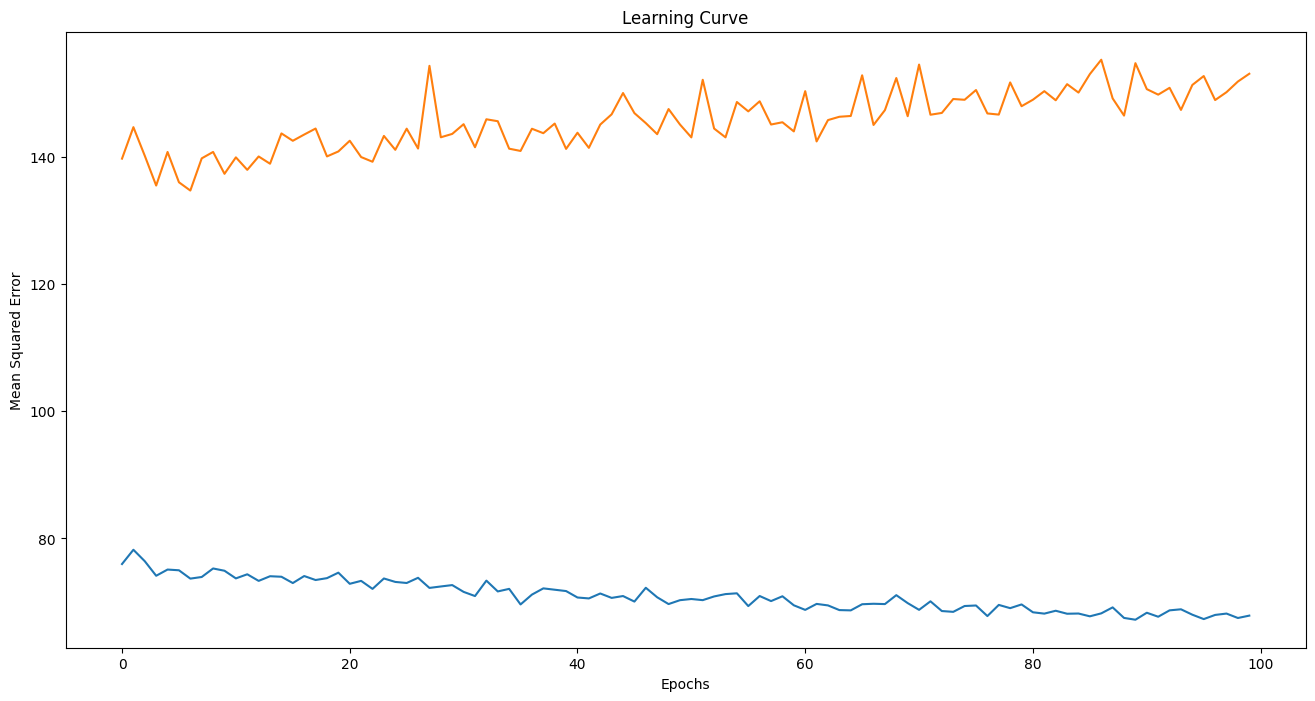

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(hist.history['loss'], label='Training MSE')
plt.plot(hist.history['val_loss'], label='Valdiation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

### Predict values for train and test

In [49]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 2ms/step


In [50]:
ypred_tr[0:5]

array([[ -50.991867],
       [ -70.28125 ],
       [-323.02417 ],
       [-282.918   ],
       [-287.33557 ]], dtype=float32)

In [51]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [52]:
ypred_ts[0:5]

array([[-206.51274 ],
       [ -69.85211 ],
       [  46.20135 ],
       [-283.34085 ],
       [  22.589092]], dtype=float32)

In [53]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


### Evaluate model based on different metrics

In [54]:
model.evaluate(xtrain, ytrain)

125/125 [==============================] - 0s 1ms/step - loss: 82.7850 - mae: 7.0518


[82.78501892089844, 7.0518317222595215]

In [55]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 0s 1ms/step - loss: 150.2585 - mae: 9.8668


[150.25851440429688, 9.86684799194336]

### Check r2 score for train and test

In [56]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_tr)

0.9973439938352722

In [57]:
r2_score(ytest, ypred_ts)

0.9952400157627924

### Save the above model

In [58]:
model.save('RegressionModel.keras')


### Load The model


In [60]:
from keras.models import load_model

In [61]:
nn = load_model('RegressionModel.keras')
nn

In [62]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
